# **OPIM 5512: Predicting Netflix Shows Rating- Team 3**
---

Team Members:

* Shraddha Shrivastava
* Anusha Vissapragada
* Nandan Adlakha
* Youngkyun Kwon
* Shruti Shikha


# **Executive Summary**
---

We obtained our dataset from Kaggle. The data consisted of the Netflix shows with their ratings. We used the SEMMA approach to build our machine learning model. As the number of rows and columns was reasonable, we did not sample the dataset. We used Tableau for our exploration process. As there were columns with little to no valuable information, we transformed them to add value. Lastly, we built four different models and picked the one with the least RMSE to predict the ratings. Based on our model's results, we identified recommendations to Netflix to help them decide what content to produce.


# **Problem Statement**
---

* Netflix is a streaming platform for various types of content in different languages. The goal of our team was to help Netflix identify what kind of content they should produce that will result in higher ratings, which is our target variable. If Netflix has content with high ratings that users want to watch, they need a model to help identify what content to stream. We as a team would try to find insights from the scraped Netflix data and help production studios with actionable recommendations to predict the score for the movie/TV show success on a scale of 10 (0-low, 10-high).

* We also tried to find insights on the content type, based on which we could make recommendations to the movie/TV show makers so that they could shift their focus to licensed/produced content accordingly. Additionally, we wanted to find a correlation between ratings and other variables such as genre, rank, cast, episodes, runtime, and show type, the different columns in our dataset. 

* It is common for people to read the summary or plot before watching a show. We also performed text analysis on title, synopsis, and description related to the show's rating. Netflix's business model is to produce content that is exclusive to their website. To further understand if "Netflix originals" are more likely to have higher ratings, we merged another dataset that classifies the shows.

# **Literature Overview**
---

One of the most important research topics for Netflix is building its recommender system. Currently, Netflix uses a mix of deep learning with collaborative filtering, SVD with filtering, design based on association rules for their recommender system. In addition to that, Netflix also uses TF-ID analysis cross-matching Netflix summary and Wikipedia pages to see if Wikipedia information (text mining) helps in developing a recommendation system. On the other hand, for ratings given by IMDB, a user casts a vote from a scale of 1 through 10, and IMDB averages the numeric ratings cast by the users.

# **DATA PREP and EDA**

## IMPORT OF MODULES, MOUNT OF GOOGLE DRIVE and READING DATA



---

Here, we are importing the modules needed, mounting the google drive and reading the data we will be visualizing and explaining.

In [ ]:
#import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path = '/content/drive/MyDrive/OPIM-5512-Team-3/Datasets/netflix_list_new_v2.csv'

Mounted at /content/drive


In [ ]:
#importing modules
import pandas as pd
import numpy as np


In [ ]:
# Load the dataframe
df = pd.read_csv(path)
df.head()

,imdb_id,title,original,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,1,15,2016.0,NaN,93.0,42.0,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,1,2,18,2021.0,NaN,NaN,148.0,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,1,3,18,2018.0,2021.0,22.0,30.0,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,0,4,13+,1994.0,2004.0,235.0,22.0,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,1,5,18,2020.0,NaN,12.0,45.0,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


## SEMMA Approach







##**About the Dataset**

**This step entails choosing a subset of the appropriate volume dataset from a vast dataset that has been given for the model’s construction.**

---

For the sample on which we will perform Modelling is Netflix Data. We used excel to do a matching for Netflix originals and created a csv file which is mounted to the drive below. The original column is a binary indicator if a show is a Netflix original or not. We also removed the columns with many missing values and target leakages.

Dataset
  
- Contains the list and metadata of all TV Shows and Movies available on Netflix.
- 19 columns & 7008 rows
- Target variable : average rating given to the show
- Variables : title, popular_rank, startYear, endYear, episodes, type, orign_country, runtime, language, summary, genres, cast, etc.

Data Source
       - Link to dataset: https://www.kaggle.com/snehaanbhawal/netflix-tv-shows-and-movie-list


In [ ]:
df.head()

,imdb_id,title,original,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,1,15,2016.0,NaN,93.0,42.0,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,1,2,18,2021.0,NaN,NaN,148.0,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,1,3,18,2018.0,2021.0,22.0,30.0,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,0,4,13+,1994.0,2004.0,235.0,22.0,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,1,5,18,2020.0,NaN,12.0,45.0,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [ ]:
# Shape
df.shape

(5426, 20)

In [ ]:
# Column Names
df.columns

Index(['imdb_id', 'title', 'original', 'popular_rank', 'certificate',
       'startYear', 'endYear', 'episodes', 'runtime', 'type', 'orign_country',
       'language', 'plot', 'summary', 'rating', 'numVotes', 'genres',
       'isAdult', 'cast', 'image_url'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5426 entries, 0 to 5425
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        5426 non-null   object 
 1   title          5426 non-null   object 
 2   original       5426 non-null   int64  
 3   popular_rank   5426 non-null   int64  
 4   certificate    2143 non-null   object 
 5   startYear      5408 non-null   float64
 6   endYear        948 non-null    float64
 7   episodes       1674 non-null   float64
 8   runtime        5424 non-null   float64
 9   type           5424 non-null   object 
 10  orign_country  5426 non-null   object 
 11  language       5426 non-null   object 
 12  plot           5312 non-null   object 
 13  summary        5426 non-null   object 
 14  rating         5269 non-null   float64
 15  numVotes       5269 non-null   float64
 16  genres         5424 non-null   object 
 17  isAdult        5426 non-null   int64  
 18  cast    

**Data Description**

---



* IMDB ID: Unique ID for each show
* Title: Name of the show
* Popular Rank: Rank among all shows
* Certificate: Age Recommendation
* Start Year: Launch Year of show
* End Year: Last Episode published
* Certificate: Age Recommendation
* Start Year: Launch Year of show
* End Year: Last Episode published
* Episodes: Number of episodes
* Type: Category of show- movie/series etc
* Runtime: View hours
* Origin Country: Native production country
* Language: Original Language 
* Plot: Story background relevance
* Summary: Essence of the entire show
* Rating: Target variable which explains what is the rating a show received
* Num Votes: Number of votes received from people
* Genres: Classification of  based on content of show
* Cast: Artists who acted in the show


##**Data Exploration and Visualization**

**During this step, multiple analysis is conducted in order to study interconnected relationships between data elements and to identify gaps in the data. All of the influencing factors that may influence the study’s outcome are analyzed, with heavy reliance on data visualization.**

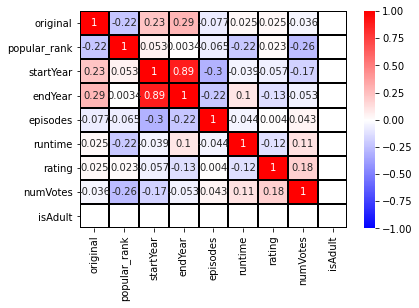

In [ ]:
import matplotlib.pyplot as plt # For plotting
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
 
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='bwr', linewidths=1, linecolor='black')#, mask=matrix)
plt.show()

**Clean up data**

Given the correlation analysis, we decided to drop some columns and transform the where necessary. For instance, the start year column was not numeric, and we converted that into a numeric value.

In [ ]:
before = type(df.startYear[0])
before
#df.startYear = df.startYear.astype('int64')
df["startYear"]=pd.to_numeric(df["startYear"])

**Box plots for further analysis**

To better understand the numeric columns, we used a boxplot analysis. We observed some outliers but decided that we should not exclude them as there can be shows with extremely high or extremely low ratings.

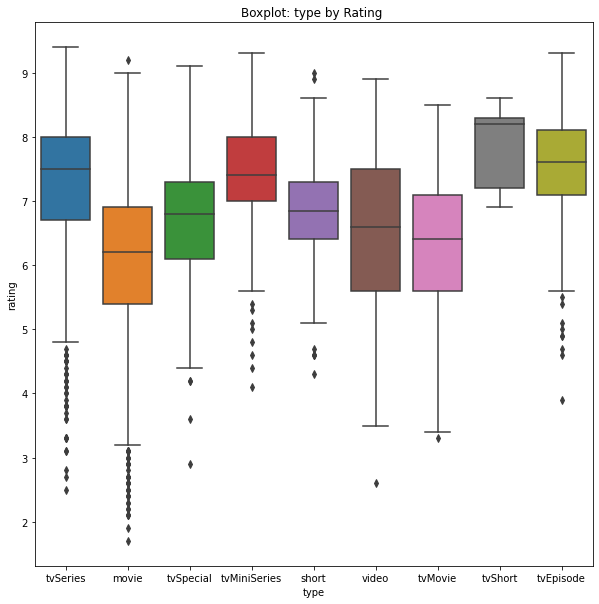

In [ ]:
# boxplot
plt.figure(figsize = (10,10))
my_color = {'tvSeries': 'cyan', 'movie': 'gold', 'short' :'blue', 'tvEpisode' : 'red', 'tvMiniSeries': 'green', 'tvMovie': 'orange', 'tvShort': 'yellow', 'tvSpecial': 'silver', 'video': 'violet', 'videoGame': 'purple'}
ax = sns.boxplot(x='type', y='rating', data=df, palette=None)
# add stripplot
#ax = sns.stripplot(x='type', y='rating', data=df, color="k", jitter=0.4, size=4.5)
# add title
plt.title("Boxplot: type by Rating ")
#plt.xticks([0,1], ['No', 'Yes'])
plt.show()

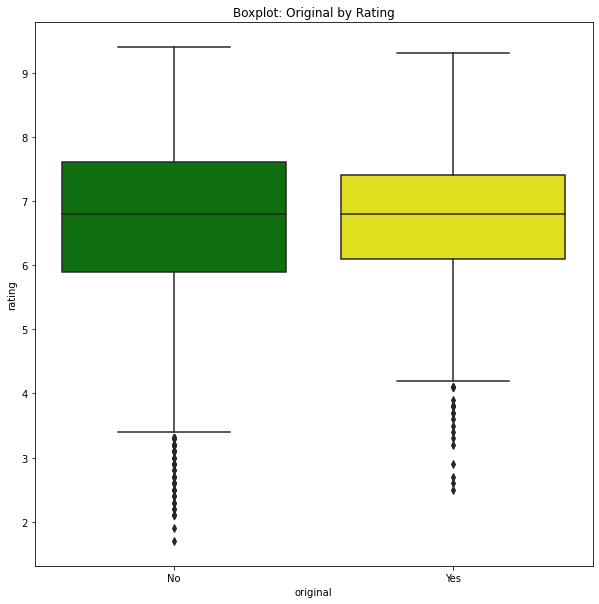

In [ ]:
# boxplot
plt.figure(figsize = (10,10))
my_color = {0: "green",1: "yellow"}
ax = sns.boxplot(x='original', y='rating', data=df, palette=my_color)
# add stripplot
#ax = sns.stripplot(x='rating', y='original', data=df, color="k", jitter=0.4, size=4.5)
# add title
plt.title("Boxplot: Original by Rating")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

**Text mining**

For this section, we used the Nltk library from Python. There were three main steps that we followed.
* Tokenize the sentences into an array
* Remove the stopwords
* Lemmatize it based on context

We then used JMP to visualize these word clouds.

In [ ]:
import nltk
import nltk.corpus
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = stopwords.words('english')

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['plot'] = df['plot'].apply(str)
df['plot'] = df['plot'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['plot'] = df['plot'].str.replace(r'[^\w\s]+', '')
df['plot'] = df['plot'].apply(lemmatize_text)

df['summary'] = df['summary'].apply(str)
df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['summary'] = df['summary'].str.replace(r'[^\w\s]+', '')
df['summary'] = df['summary'].apply(lemmatize_text)

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,imdb_id,title,original,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,1,15,2016.0,NaN,93.0,42.0,tvSeries,United States,English,"[Lucifer, Morningstar, decided, he, enough, du...","[Lucifer, Morningstar, bored, sulking, life, h...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,1,2,18,2021.0,NaN,NaN,148.0,movie,United States,English,"[Following, zombie, outbreak, Las, Vegas, grou...","[With, abandoned, walled, city, Las, Vegas, ov...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,1,3,18,2018.0,2021.0,22.0,30.0,tvSeries,United States,English,"[An, aging, actor, long, ago, enjoyed, brush, ...","[Michael, Douglas, play, actor, made, big, lon...",8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,0,4,13+,1994.0,2004.0,235.0,22.0,tvSeries,United States,English,"[Follows, personal, professional, life, six, t...","[Ross, Geller, Rachel, Green, Monica, Geller, ...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,1,5,18,2020.0,NaN,12.0,45.0,tvSeries,Norway,Norwegian,"[A, small, Norwegian, town, experiencing, warm...","[In, small, fictional, town, Edda, coming, age...",7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


For instance, shows with the highest ratings had these keywords in the summary and plot.
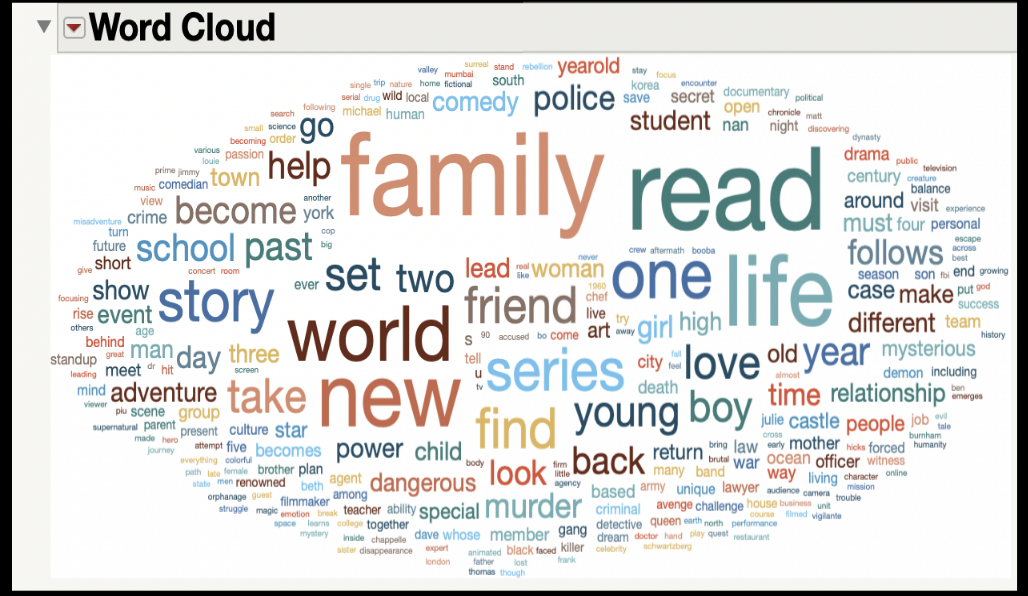

Graph of number of shows per country displays the most common category of a show country produced.Main countries whose data is considered are United States, United Kingdom, Japan,India,South Korea, others.

 Evidently all countries produces "movies" with huge figures followed by TV series.


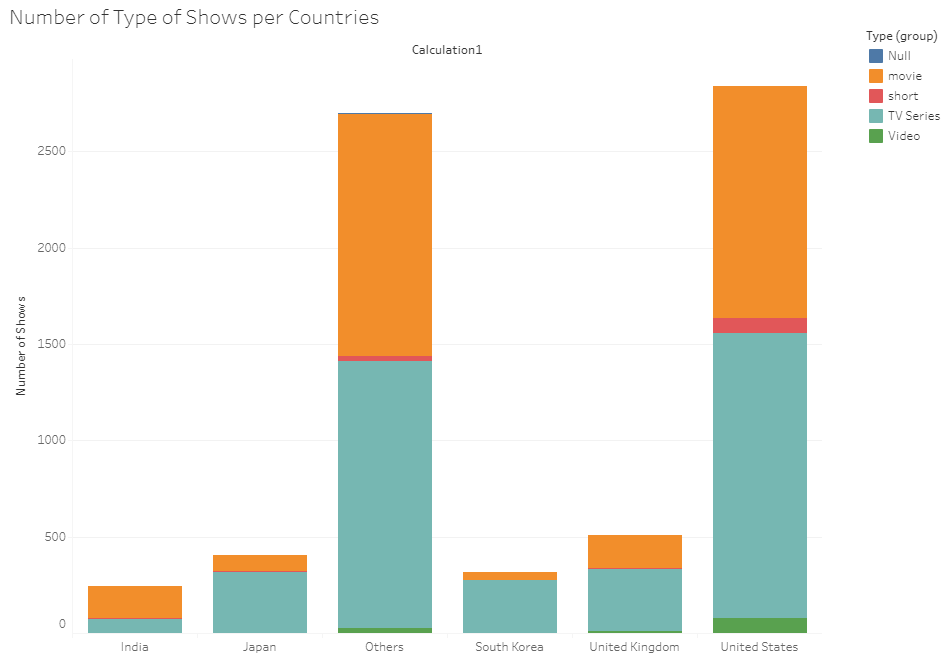

Top most languages from data analysis are English, Korean,Spanish and others. We tried to evaluate the average rating based on two factors 
i.e. Language and runtime. Runtime is maximum number of hours a show was played for.From the below graph we can conclude that English shows has maximum runtime with a rating of 6.5.
However to our surprise, highest rating with a value of 7 and above is bragged by Korean Shows with minimal runtime.





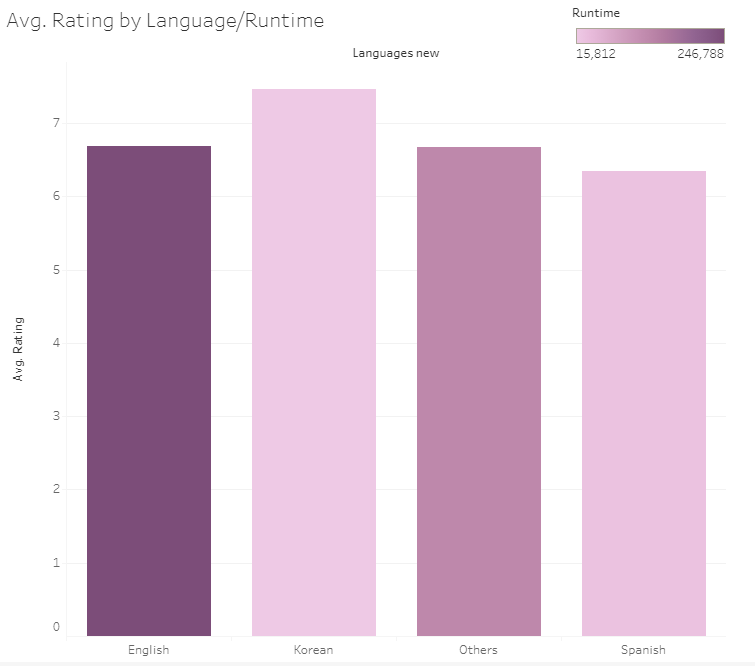

The graph displays count of distinct shows produced since 1996 till 2022 and are available for preview on netflix.
We have highest rating in the year of 2000. 
It is presumably because of two reasons:
1.   Content of shows produced in 2000 was outstandingly good.
2.   Netflix found popularity on alrge scale in 2000.

Maximum number of shows were available on netflix in the year of 2021.

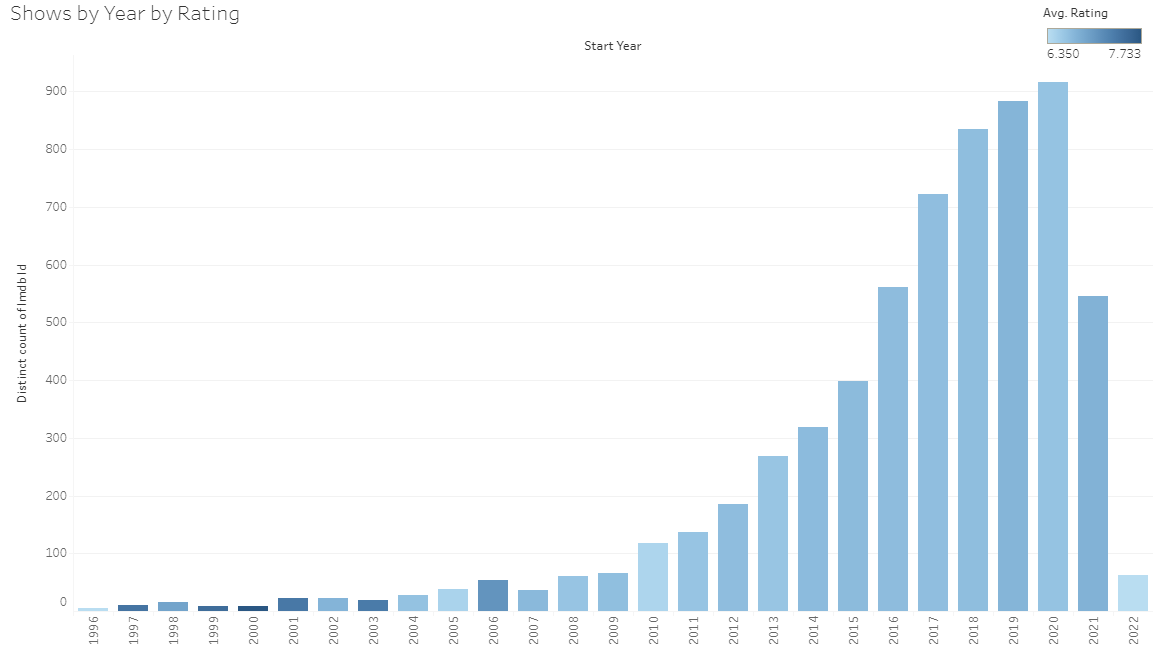

On conducting visualization based upon Genre, we can conclude that Comedy,Drama and Documentary are the most favourite categories of viewers.Thriller genre is a potential upcoming category


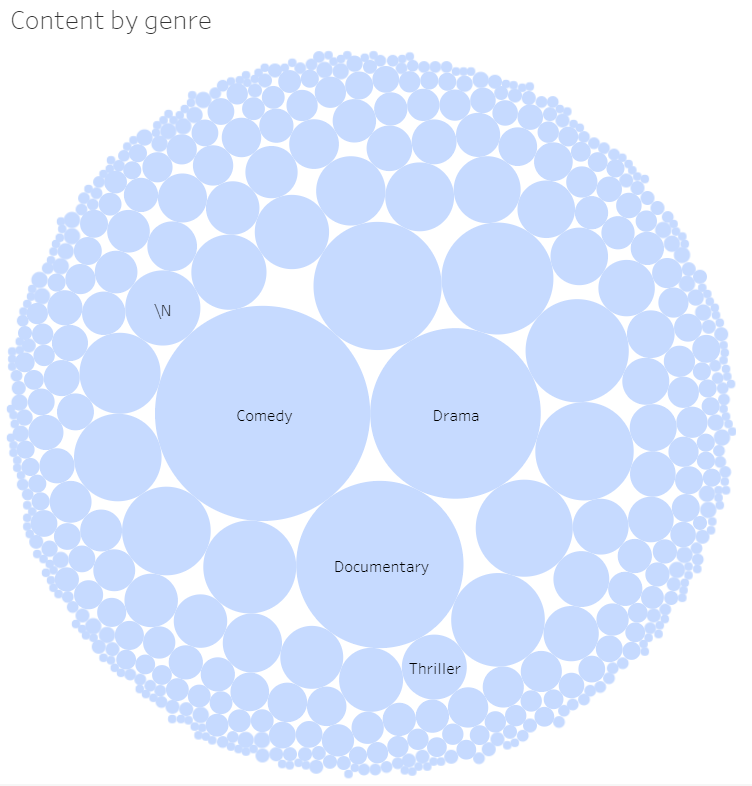

## **Modify**


**In this step,the data is parsed and cleaned, being then passed onto the modeling stage, and explored if the data requires refinement and transformation.**

---

1. Dropping Columns which has very low correlation in Exploration part.
2. From the data exploration we can see many rows has no value for column rating. Dropping rows without target variable.
3.Language column has 67 distinct language, therefore picking up langugaes with most movies and converting other languages in to category Others.
4.Similarly, For, Origin_Countries we have 78 distinct countries of origin for shows, therefore keeping the top 5 countries with most shows and changing all others to category "Others" so to have fewer countries while analysis.
5. Also, there are '-' and'/N' values in data which was affecting our model. Hence, we dropped those rows with '-' and'/N' values as they were very few.
6.Converting all the string categorical values to numbers using Label Encoder.
7. For the column Genre and Cast, we took the number of count of Genre and Cast for each row. Aslo, Converted it into main_genre using split.


Dropping Columns which has very low correlation in the exploration part. Given the low value the variables add to the target value, we decided to drop these columns.

In [ ]:
drop_columns = ["imdb_id", "certificate", "image_url", "endYear", "episodes", "isAdult" ]
df = df.drop(drop_columns, axis=1)

We also found columns that were missing the target values. To reduce the noise in our model, we removed these rows as well.

In [ ]:
bool_series = pd.notnull(df["rating"])
df = df[bool_series]

We did a final check for missing values in our data. We found that plot had around 84 missing values but decided to leave it as is becuase it would only be helpful in our text mining and not in building the models.

In [ ]:
df.isnull().sum()

title            0
original         0
popular_rank     0
startYear        0
runtime          0
type             0
orign_country    0
language         0
plot             0
summary          0
rating           0
numVotes         0
genres           0
cast             0
dtype: int64

From the boxplot analysis, we noticed that there were many languages in the column. However, the outliers were English, Korean, and Spanish. We decided to leave the above-mentioned three in their own categories and combine the rest into an "others" column.

In [ ]:
#Modifying the number of values in language column
df['language'].value_counts()

English                     3106
Japanese                     314
Spanish                      311
Korean                       228
-                            168
                            ... 
Afrikaans                      1
Yiddish                        1
Yoruba                         1
Scanian                        1
Greek, Ancient (to 1453)       1
Name: language, Length: 67, dtype: int64

In [ ]:
#Modifying the number of values in language column
df.loc[(df['language'] != 'English') & (df['language'] != 'Korean') & (df['language'] != 'Spanish'), 'language'] = 'Others' 

In [ ]:
#Final number of language column
df['language'].value_counts()

English    3106
Others     1624
Spanish     311
Korean      228
Name: language, dtype: int64

Similar to language, we decided to transform the origin country column as well.

In [ ]:
#Modifying the number of values in orign_country column
df['orign_country'].value_counts()

United States     2251
United Kingdom     427
Japan              328
South Korea        236
India              206
                  ... 
Jordan               1
Paraguay             1
Saudi Arabia         1
Albania              1
Iraq                 1
Name: orign_country, Length: 78, dtype: int64

In [ ]:
#Modifying the number of values in orign_country column
df.loc[(df['orign_country'] != 'United States') & (df['orign_country'] != 'United Kingdom') & (df['orign_country'] != 'Japan') & (df['orign_country'] != 'South Korea') & (df['orign_country'] != 'India'), 'orign_country'] = 'Others' 

In [ ]:
#Final number of origin_country values
df['orign_country'].value_counts()

United States     2251
Others            1821
United Kingdom     427
Japan              328
South Korea        236
India              206
Name: orign_country, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5425
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          5269 non-null   object 
 1   original       5269 non-null   int64  
 2   popular_rank   5269 non-null   int64  
 3   startYear      5269 non-null   float64
 4   runtime        5269 non-null   float64
 5   type           5269 non-null   object 
 6   orign_country  5269 non-null   object 
 7   language       5269 non-null   object 
 8   plot           5269 non-null   object 
 9   summary        5269 non-null   object 
 10  rating         5269 non-null   float64
 11  numVotes       5269 non-null   float64
 12  genres         5269 non-null   object 
 13  cast           5269 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 617.5+ KB


Finally, we converted the categorical values into numbers using the preprocessing library to add it to our model.

In [ ]:
# Convert categorical values into numbers
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['type'] = class_le.fit_transform(df['type'])
df['orign_country'] = class_le.fit_transform(df['orign_country'])
df['language'] = class_le.fit_transform(df['language'])

We noticed that we could also transform our cast variable. We created a formula that would capture the main cast. We applied the same process to main genre.

In [ ]:
#checking unique cast
df.cast.unique(), df.cast.nunique()

(array(["['Tom Ellis', 'Lauren German', 'Lesley-Ann Brandt', 'Kevin Alejandro', 'D.B. Woodside', 'Rachael Harris', 'Scarlett Estevez', 'Aimee Garcia', 'Tricia Helfer', 'Tom Welling', 'Inbar Lavi', 'Kevin Rankin', 'Graham McTavish', 'Dennis Haysbert', 'Genevieve Gauss', 'John Specogna', 'Jeremiah Birkett', 'Cailan Robinson']",
        "['Dave Bautista', 'Ella Purnell', 'Ana de la Reguera', 'Omari Hardwick', 'Theo Rossi', 'Matthias Schweighöfer', 'Nora Arnezeder', 'Hiroyuki Sanada', 'Garret Dillahunt', 'Tig Notaro', 'Raúl Castillo', 'Huma Qureshi', 'Samantha Win', 'Richard Cetrone', 'Michael Cassidy', 'Steve Corona', 'Chelsea Edmundson', 'Zach Rose']",
        "['Michael Douglas', 'Sarah Baker', 'Graham Rogers', 'Melissa Tang', 'Jenna Lyng Adams', 'Casey Thomas Brown', 'Alan Arkin', 'Nancy Travis', 'Lisa Edelstein', 'Emily Osment', 'Ashleigh LaThrop', 'Paul Reiser', 'Ramon Hilario', 'Susan Sullivan', 'Jane Seymour', 'Haley Joel Osment', 'Kathleen Turner', 'Cedric Begley']",
        ...,


In [ ]:
#creating new column main cast
df['main_cast'] = df.cast.str.split(',').str[0]

In [ ]:
#checking the distinct values in main cast
df.main_cast.unique(), df.main_cast.nunique()

(array(["['Tom Ellis'", "['Dave Bautista'", "['Michael Douglas'", ...,
        "['Bradley James'", "['Kaolip'", "['Mashama Bailey']"],
       dtype=object), 3996)

In [ ]:
#Converting cast column into string and joining caste value count back in the table
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['main_cast'] = le.fit_transform(df.main_cast)
cast_value_counts = df.cast.value_counts()
cast_value_counts  = pd.DataFrame(cast_value_counts).reset_index().rename(columns = {'index' : 'cast', 'cast' : 'cast_value_counts'})
df = pd.merge(df, cast_value_counts,left_on = 'cast', right_on = 'cast', how = 'left')

In [ ]:
#Checking unique number of genres in the dataset
df.genres.unique(), df.genres.nunique()

(array(['Crime,Drama,Fantasy', 'Action,Crime,Horror', 'Comedy,Drama',
        'Comedy,Romance', 'Action,Drama,Fantasy', 'Crime,Thriller',
        'Drama,Romance', 'Crime,Drama,Mystery', 'Action,Adventure,Drama',
        'Crime,Drama', 'Drama,Horror,Thriller', 'Crime,Drama,Thriller',
        'Comedy,Drama,Music', 'Adventure,Animation,Comedy',
        'Adventure,Biography,Drama', 'Animation,Comedy,Fantasy',
        'Action,Crime,Drama', 'Drama,Fantasy,Horror',
        'Action,Crime,Mystery', 'Drama,Fantasy,Romance',
        'Comedy,Drama,Romance', 'Comedy', 'Action,Adventure,Animation',
        'Biography,Drama', 'Comedy,Crime', 'Adventure,Comedy,Crime',
        'Drama', 'Biography,Drama,History', 'Drama,Sci-Fi,Thriller',
        'Drama,Mystery,Sci-Fi', 'Action,Comedy,Drama',
        'Action,Drama,History', 'Action,Adventure,Fantasy',
        'Drama,Horror,Mystery', 'Drama,Fantasy,Sci-Fi',
        'Action,Adventure,Comedy', 'Action,Adventure,Mystery',
        'Drama,Family', 'Comedy,Crim

In [ ]:
#Creating the main_genre
df['main_genre'] = df.genres.str.split(',').str[0]

In [ ]:
df.main_genre.unique(), df.main_genre.nunique()

(array(['Crime', 'Action', 'Comedy', 'Drama', 'Adventure', 'Animation',
        'Biography', 'Horror', 'Mystery', 'Musical', 'Family', 'Game-Show',
        'Reality-TV', 'Documentary', 'Thriller', 'Sci-Fi', 'Fantasy',
        'History', 'Romance', 'Sport', 'Talk-Show', 'Music', 'Film-Noir',
        'Western', 'War', '\\N', 'News', 'Short'], dtype=object), 28)

We had an additional character \\N for genres that we had to remove.

In [ ]:
#removing unwanted data //N from the dataset
df = df.loc[df["main_genre"] != '\\N']
df.main_genre.unique(), df.main_genre.nunique()

(array(['Crime', 'Action', 'Comedy', 'Drama', 'Adventure', 'Animation',
        'Biography', 'Horror', 'Mystery', 'Musical', 'Family', 'Game-Show',
        'Reality-TV', 'Documentary', 'Thriller', 'Sci-Fi', 'Fantasy',
        'History', 'Romance', 'Sport', 'Talk-Show', 'Music', 'Film-Noir',
        'Western', 'War', 'News', 'Short'], dtype=object), 27)

In [ ]:
#Label Encoding the columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['main_genre'] = le.fit_transform(df.main_genre)
genres_value_counts = df.genres.value_counts()
genres_value_counts  = pd.DataFrame(genres_value_counts).reset_index().rename(columns = {'index' : 'genres', 'genres' : 'genres_value_counts'})
df = pd.merge(df, genres_value_counts,left_on = 'genres', right_on = 'genres', how = 'left')
df = df.drop(columns = 'genres')

We converted all of categorical variables into numeric.
Lastly, we noticed that our runtime had vast values because of the type of content. We decided to use a log transformation for that variable.

In [ ]:
#transforming runtime to log of the runtime
df['runtime'] = np.log(df['runtime'])

In [ ]:
df.head()

,title,original,popular_rank,startYear,runtime,type,orign_country,language,plot,summary,rating,numVotes,cast,main_cast,cast_value_counts,main_genre,genres_value_counts
0,Lucifer,1,1,2016.0,3.737670,5,5,0,"[Lucifer, Morningstar, decided, he, enough, du...","[Lucifer, Morningstar, bored, sulking, life, h...",8.1,250884.0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",3700,1,5,12
1,Army of the Dead,1,2,2021.0,4.997212,0,5,0,"[Following, zombie, outbreak, Las, Vegas, grou...","[With, abandoned, walled, city, Las, Vegas, ov...",5.8,110780.0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",875,1,0,1
2,The Kominsky Method,1,3,2018.0,3.401197,5,5,0,"[An, aging, actor, long, ago, enjoyed, brush, ...","[Michael, Douglas, play, actor, made, big, lon...",8.2,28795.0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",2616,1,4,162
3,Friends,0,4,1994.0,3.091042,5,5,0,"[Follows, personal, professional, life, six, t...","[Ross, Geller, Rachel, Green, Monica, Geller, ...",8.9,861843.0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",1713,1,4,99
4,Ragnarok,1,5,2020.0,3.806662,5,2,2,"[A, small, Norwegian, town, experiencing, warm...","[In, small, fictional, town, Edda, coming, age...",7.5,26606.0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",916,1,0,15


##**Model**

**With the variables refined and data cleaned, the modeling step applies a variety of data mining techniques in order to produce a projected model of how this data achieves the final, desired outcome of the process.**

---
For the modelling purpose we have selected the Predictor variables with High Correlation to our Target variable Rating. Going Ahead, we splitted our data into train, test as (75/25) to create the below four models.

1. Linear Regression
2. KNN
3. Neural Network
4. Boosted Tree: Ensemble Model



We used a combination of different variables befire finally selecting feature to identify the variables that had the most weight to the model and decided the following:


*   original
*   type
* origin country
* language
* runtime
* main genre
* cast value counts




In [ ]:
#Selecting the variables for Modeling
X = df[['original','type','orign_country','language','runtime','main_genre','cast_value_counts']]
y = df['rating']

We used a 75% and 25% split for training and test respectively and tried four different models.

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [ ]:
#Linear Regression

#importing the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 6
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 6)            # running RFE
rfe = rfe.fit(X_train, y_train)

print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

col_rfe = X_train.columns[rfe.support_]
col_rfe

X_train.columns[~rfe.support_]

#Creating a X_train dataframe with rfe varianles
X_train_rfe = X_train[col_rfe]

# Adding a constant variable for using the stats model
import statsmodels.api as sm
X_train_rfe_constant = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train,X_train_rfe_constant).fit()   # Running the linear model

X_test_rfe = X_test[col_rfe]
X_test_rfe_constant = sm.add_constant(X_test_rfe)

y_pred_linear = lm1.predict(X_test_rfe_constant)

y_pred_linear.values

y_pred_linear.min(), y_pred_linear.max()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred_linear, y_test)

lnr_rmse = np.sqrt(mse)
print("Model Accuracy: %.3f" % lm.score(X_test, y_test))
print('RMSE:' , lnr_rmse)

[('original', True, 1), ('type', True, 1), ('orign_country', True, 1), ('language', True, 1), ('runtime', True, 1), ('main_genre', True, 1), ('cast_value_counts', False, 2)]
Model Accuracy: 0.131
RMSE: 1.0985549382358162


In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = [x for x in range(1,30)]
mse_values = list()

for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i, algorithm='brute')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    mse_value = mean_squared_error(y_test, predictions)
    mse_values.append(mse_value)
    if mse_value == min(mse_values):
        parameter = i
        knn_rmse = np.sqrt(mse_value)

print("Parameter K:", parameter) 
print("Model Accuracy: %.3f" % knn.score(X_test, y_test))
print('RMSE:', knn_rmse)

Parameter K: 21
Model Accuracy: 0.324
RMSE: 0.966551982927021


In [ ]:
#Neural Networks
from sklearn.neural_network import MLPRegressor

learning_rate_inits = np.arange(0.01, 0.5, 0.01)
mse_values_n = list()

for r in learning_rate_inits:
  regr = MLPRegressor(hidden_layer_sizes=1, learning_rate_init = r, 
            max_iter=500, early_stopping=True).fit(X_train, y_train)
  prediction = regr.predict(X_test)
  mse_value = mean_squared_error(y_test, predictions)
  mse_values_n.append(mse_value)
      
  if mse_value == min(mse_values_n):
    learning_rate = r
    nn_rmse = np.sqrt(mse_value)

print('Learning Rate:', learning_rate)
print("Model Accuracy: %.3f" % regr.score(X_test, y_test))
print('RMSE:' , nn_rmse)

Learning Rate: 0.49
Model Accuracy: -0.002
RMSE: 0.9700084716428288


In [ ]:
# Boosting: Ensemble model
from sklearn.ensemble import GradientBoostingRegressor
# Hyperparameters for GradientBoostingRegressor
# Manually input hyperparameters to get the lowest RMSE
gbr = GradientBoostingRegressor(n_estimators=2300, max_depth=3,
                                min_samples_split=5, learning_rate=0.01,
                                loss='ls', random_state=10)
gbr.fit(X_train, y_train)
mse_value = mean_squared_error(y_test, gbr.predict(X_test))

boosted_rmse = np.sqrt(mse_value)

print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
print('RMSE:' , boosted_rmse)

Model Accuracy: 0.388
RMSE: 0.9224753447350372


## **Assess**

**In this final SEMMA stage, the model is evaluated for how useful and reliable it is for the studied topic. The data can now be tested and used to estimate the efficacy of its performance.**

---
The RMSE Values of the above four models are as below:

1. Linear: 1.0985
2. KNN: 0.9665
3. Neural Network: 0.9700
4. Boosted Tree (Ensemble Model): 0.9225

From the above four RMSE Values, we can say that the Boosted Tree: Ensemble method gives the least RMSE and therefore we will use the Boosted Tree Ensemble method for Predicting Ratings.

In [ ]:
RMSE=[lnr_rmse,knn_rmse,nn_rmse,boosted_rmse]
col={'Root Mean Square Error': RMSE}
models=['Linear Regression','KNN','Neural Network','Boosted Tree']
dfplot=pd.DataFrame(data=col,index=models)
dfplot

,Root Mean Square Error
Linear Regression,1.098555
KNN,0.966552
Neural Network,0.970008
Boosted Tree,0.922475


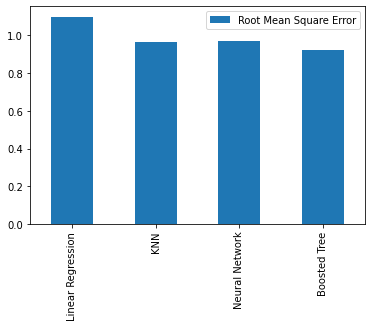

In [ ]:
dfplot.plot(kind='bar')

Based on the above graph, we decided that the boosted tree was the best model.

# **Final Conclusions and Recommendations**
---
Conclusions:

* After doing some text mining and exploratory analysis on the genres variable, we observed that the genres with the lowest rating was horror while the highest ratings had drama followed by comedy.
* Given the text analysis, we observed some keywords such as family, read, world, new, life and friend in the summary and plot variables, that result in higher ratings of the shows.
* We also added a new column with original Netflix context, but it did not have a major impact on the rating, so Netflix should continue to be a streaming partner as well as produce original content.
* Another observation was that the number of cast members plays a significant role in the ratings and hence, the larger the ensemble cast, the more likely to have higher ratings.

Based on the above observations, to achieve an optimal rating, we have the following recommendations to the production houses of Movies/TV shows:

* They should focus more on the Drama/comedy genre.

* They should try to have an ensemble cast of popular actors.

* They should focus more on the keywords such as family, read, world, new, life and friend in the summary or plot of the Movie/TV show.
